In [156]:
import cv2
import numpy
import imutils
from PIL import Image

# read and grayscale image
img1 = cv2.imread("D:/ML/test_images/stop_sign_large.jpg")
img2 = cv2.imread("D:/ML/test_images/stop_sign2.jpg")
img1_rot = imutils.rotate(img1, 45)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray1_rot = imutils.rotate(gray1, 45)

# create orb object and return keypoints,descriptors

orb = cv2.ORB_create(50) # number of detections(taking less for now)
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)
keypoints1_rot, descriptors1_rot = orb.detectAndCompute(gray1_rot, None)

# Example 1

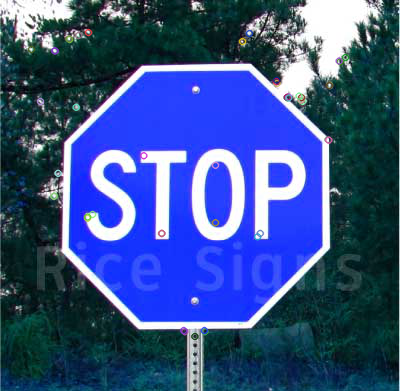

In [157]:
# draw keypoints for 1st image
kps_img = cv2.drawKeypoints(img1, keypoints1, None)
Image.fromarray(kps_img)

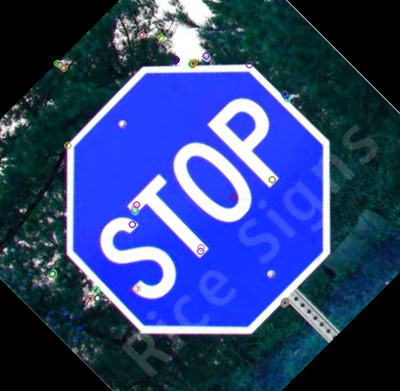

In [158]:
# draw keypoints for rotated image
kps_img = cv2.drawKeypoints(img1_rot, keypoints1_rot, None)
Image.fromarray(kps_img)

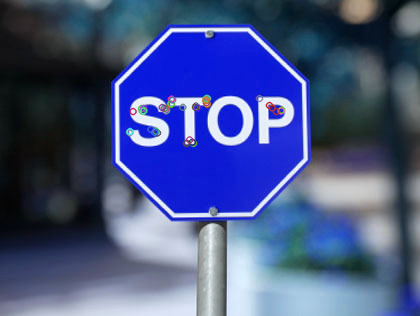

In [159]:
# draw keypoints for 2nd image
kps_img = cv2.drawKeypoints(img2, keypoints2, None)
Image.fromarray(kps_img)

Total matches: 19


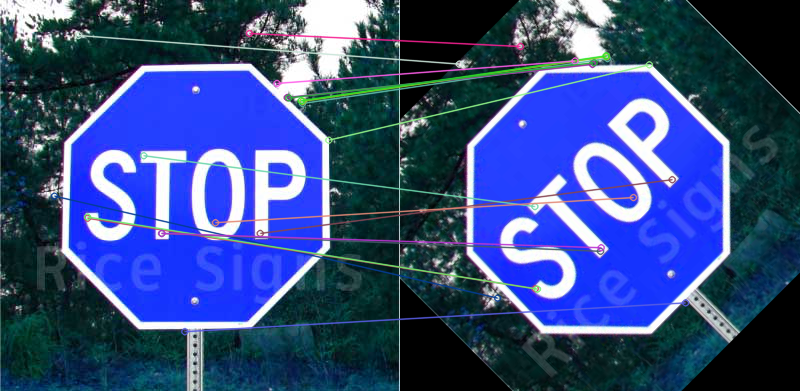

In [161]:
# compare the descriptors with rotated image

bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors1_rot)
# matches_sorted = sorted(matches, key = lambda x: x.distance)

# draw matches to img
matching_result = cv2.drawMatches(img1,keypoints1, img1_rot, keypoints1_rot, matches, None, flags=2)

print("Total matches:",len(matches))
Image.fromarray(matching_result)

##### ORB like SIFT are robust to rotations,sheer,addition of noise and also for change in 3D viewpoint, so the features can be matched efficiently for same rotated image.

Total matches: 17


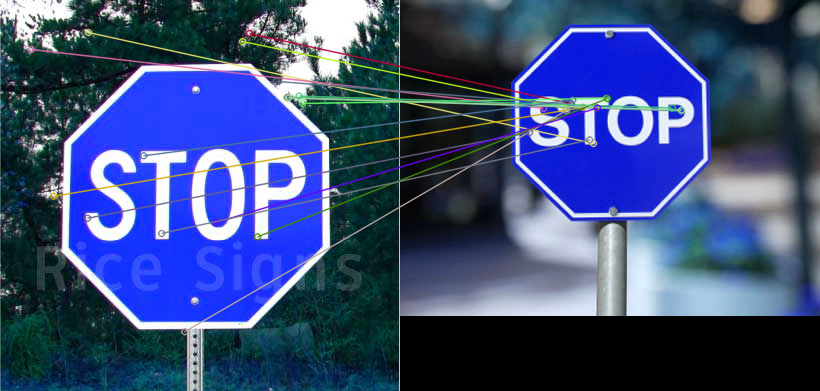

In [163]:
# match the descriptors different images

matches = bf.match(descriptors1, descriptors2)
# matches_sorted = sorted(matches, key = lambda x: x.distance)

# draw matches to img
matching_result = cv2.drawMatches(img1,keypoints1, img2, keypoints2, matches, None, flags=2)

print("Total matches:",len(matches))
Image.fromarray(matching_result)

##### Here we can spot some features dont match exactly right eg(the tree part is matched with some point on stop sign)

# Example 2

Let's Take another example to tackle the problem

Total matches: 88


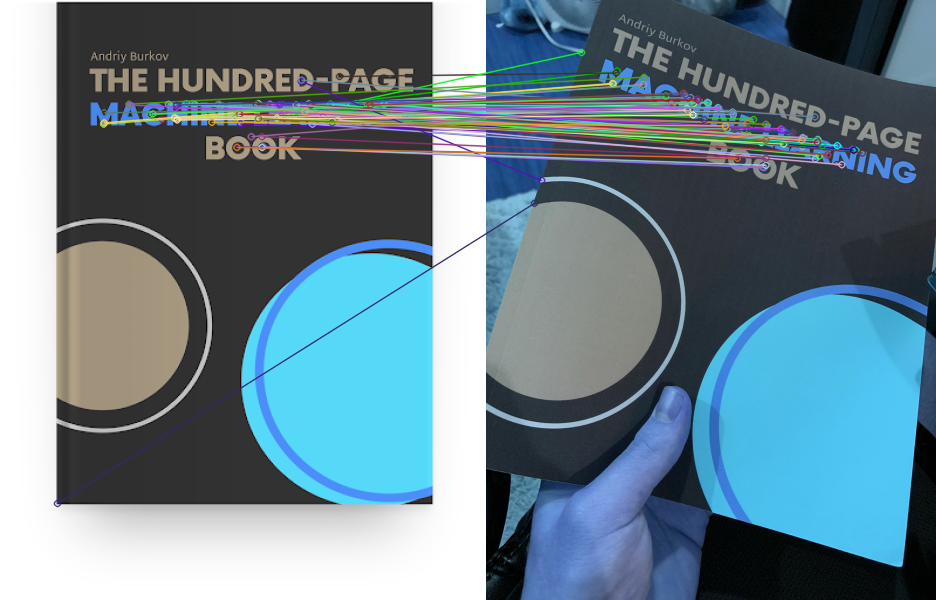

In [164]:
# read and grayscale image
img1 = cv2.imread("D:/ML/test_images/book1.png")
img2 = cv2.imread("D:/ML/test_images/book2.jpg")

# resize as the original size was huge
img1 = imutils.resize(img1, height=600)
img2 = imutils.resize(img2, height=600)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create orb object and detect keypoints,descriptors

orb = cv2.ORB_create(200)
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
# matches = sorted(matches, key = lambda x: x.distance)

# draw matches to img
matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=2)

print("Total matches:",len(matches))
Image.fromarray(matching_result)

##### upper result has lots of missclassifications(the result keypoint dont seem to match), to solve this lets use method proposed by David Lowe in his paper on SIFT. 
This test rejects poor matches by computing the ratio between the best and second-best match. If the ratio is below some threshold, the match is discarded as being low-quality. I made little changes to work in python 
-source - https://stackoverflow.com/questions/17967950/improve-matching-of-feature-points-with-opencv

In [165]:
ratio = 0.8 # lesser the ratio harder the comparision
new_matches = []
for i in range(len(matches)):
    if not i == len(matches) - 1:
        if matches[i].distance < ratio*matches[i+1].distance:
            new_matches.append(matches[i])

Total matches: 25


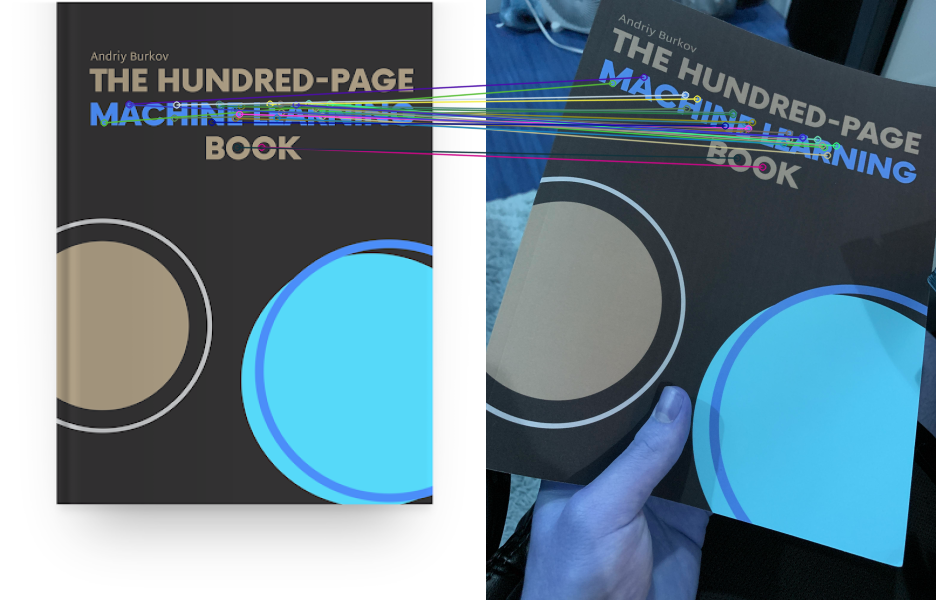

In [166]:
# draw matches to img
matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, new_matches, None, flags=2)

print("Total matches:",len(new_matches))
Image.fromarray(matching_result)

##### Results look much better now !!